In [2]:
import numpy as np
import scipy.optimize as optimize
import holoviews as hv
from holoviews import opts
hv.extension('matplotlib', logo=False)

# The 3D-1D transition in the Gross-Pitaevskii equation

The goal is to write a non-dimensional energy functional for the Gross-Pitaevskii equation using a Gaussian Ansatz in 3D
\begin{equation}
\psi(x,y,z) = \left( \frac{1}{(\pi)^{3/2} l_x l_y l_z} \right)^{1/2} e^{-\frac{1}{2} (\frac{x^2}{l_x^2} + \frac{y^2}{l_y^2} + \frac{z^2}{l_z^2}) },
\end{equation}
which is normalised to the number of particles in the system $\int d\textbf{r}|\psi(\textbf{r}|^2=N$
.The energy functional is given by
\begin{equation}
E=\int_{-\infty}^{\infty}dxdydz \psi(x,y,z) \left[ -\frac{\hbar^2}{2m} \nabla^2 + \frac{1}{2}m(\omega_x^2 x^2 + \omega_y^2 y^2 + \omega_z^2 z^2) \right. \\ \left.  + \frac{4\pi \hbar^2 a}{m} |\psi(x,y,z)|^2 \right] \psi(x,y,z),
\end{equation}
so a straightforward integration allows us to write the energy per particle $\epsilon=E/N$ as
\begin{equation}\label{eq:EperN}
\epsilon = \frac{\hbar^2}{4m} ( \frac{1}{l_x^2} + \frac{1}{l_y^2} + \frac{1}{l_z^2} ) + \frac{m}{4}(\omega_x^2 l_x^2 + \omega_y^2 l_y^2 + \omega_z^2 l_z^2) + \sqrt{\frac{2}{\pi}}\frac{\hbar^2 a N}{m l_x l_y l_z} .
\end{equation}
Since we want to investigate the 3D to 1D crossover, it makes sense to set $\omega_x = \omega_y = \omega_{\perp}$ and hence $l_x = l_y = R$ so we can later make $\omega_{\perp}$ large to enforce a quasi-1D (cigar-like) shape of the cloud. 
To make the energy functional dimensionless, we scale the lengths by the lengths of the pure harmonic oscillator i.e. $\lambda_i = \frac{l_i}{b_i}$, where $b_i = \sqrt{\frac{\hbar}{m \omega_i}}$. 
Identifying two non-dimensional parameters $\tilde{\omega} = \frac{\omega_z}{\omega_\perp} = \frac{b_{\perp}^2}{b_z^2}$ and $\gamma= \sqrt{\frac{2}{\pi}}\frac{aN}{b_z}$ and scaling $\epsilon$ by the ground state energy of the harmonic oscillator in the radial direction $\epsilon_{\perp}^0 = \frac{\hbar \omega_\perp}{2} = \frac{\hbar^2}{2mb_\perp^2} = \frac{1}{2}m\omega_\perp^2b_\perp^2$ we obtain
\begin{equation}\label{eq:EperNnondim}
\frac{\epsilon(\lambda_{\perp},\lambda_z,\tilde{\omega},\gamma)}{\epsilon_{\perp}^0} = \frac{1}{\lambda_{\perp}^2} + \tilde{\omega}^2\frac{1}{2\lambda_z^2} + \lambda_{\perp}^2 + \frac{1}{2}\tilde{\omega}\lambda_z^2 + \gamma\frac{1}{\lambda_{\perp}^2\lambda_z}.
\end{equation}

Setting $\lambda_r = 1$ for now, we can explore what happens for different values of $\gamma$ and $\omega$:

:DynamicMap   [ω,γ]
   :Curve   [$\lambda_z$]   ($\epsilon$)
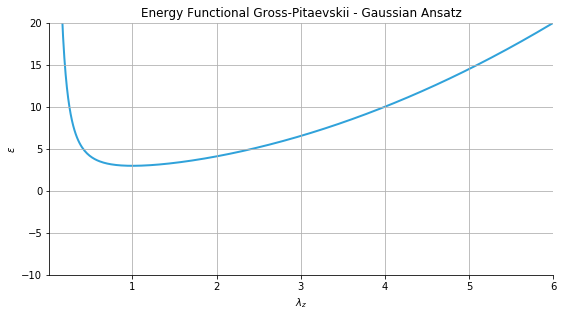

In [130]:
def e(lzs, omega=0.1, gamma=0.1):
    return (1 + (omega**2)/(2*(lzs**2)) ) + (1+ (omega*(lzs**2))/2 ) + (gamma)/(lzs)

def plot_e_lz(omega, gamma): 
    lzs = np.linspace(0.01,6,400)
    es = e(lzs, omega, gamma)
    plot = hv.Curve((lzs, es), kdims='$\lambda_z$', vdims='$\epsilon$').opts(aspect=2, fig_size=250, ylim=(-10,20), show_grid=True)
    return plot.opts(title='Energy Functional Gross-Pitaevskii - Gaussian Ansatz')

dim_omega = hv.Dimension('ω',  step=0.05, default=1)
dim_gamma = hv.Dimension('γ', step=0.05, default=0)
energy_vs_lz = hv.DynamicMap(plot_e_lz, kdims=[dim_omega, dim_gamma])
energy_vs_lz.redim.range(ω=(0.1,1), γ=(-1,2))
# hv.HoloMap(energy_vs_lz[{0.1,0.4,0.7,1},{-1,-0.1,0,0.1,1}])

Now the only thing left to do is to minimize the functional with respect to $\lambda_z$ and $\lambda_{\perp}$ and to explore the parameter space $(\tilde{\omega}, \gamma)$. Since we know that there might be more than one solution that (locally) minimizes the energy (think of 3D GPE with attractive mean-field --> semi-stable solution and implosion), it makes more sense to look for stable solutions instead of minimizing the energy directly. 

\begin{equation}
\frac{\partial \epsilon}{\partial \lambda_{\perp}} = -\frac{1}{\lambda_{\perp}^3} + \lambda_{\perp} - \frac{\gamma}{\lambda_{\perp}^3 \lambda_z}  = 0
\end{equation}

\begin{equation}
\frac{\partial \epsilon}{\partial \lambda_z} = -\frac{\tilde{\omega}^2}{\lambda_{\perp}^3} + \tilde{\omega}\lambda_z - \frac{\gamma}{\lambda_{\perp}^2 \lambda_z^2} = 0.
\end{equation}

Combining these two conditions we obtain
\begin{equation}
    \lambda_{\perp}^4 = \frac{\gamma}{\lambda_z} +1 \qquad \& \qquad \lambda_z^4 - \frac{\gamma}{\tilde{\omega}}\frac{ \lambda_z^3}{\sqrt{\gamma+\lambda_z}} - \tilde{\omega} = 0,
\end{equation}
so we really only need to solve for $\lambda_z$.

Just to check that we reduce to the known parameters: for $\gamma=0$ we have $\lambda_{\perp} = 1$ and $\lambda_z=(\omega)^\frac{1}{4}$. Thus when the confinement frequencies are equal $\omega_z=\omega_{\perp}$ we also have that $\lambda_z=\lambda_{\perp}=1$, as expected. The rescaled energy in this case is then $\epsilon=3$ as expected from the equipartition theorem.